# predict whether the client has subscribes a term deposit or not

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import statsmodels.api as sm

In [2]:
df=pd.read_csv('E://EXCELR//Data science//Data science assignment//6) Logistic Regression//bank-full.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,32,blue-collar,married,primary,no,697,yes,no,unknown,23,may,700,1,-1,0,unknown,no
5302,31,self-employed,single,tertiary,no,14692,yes,no,unknown,23,may,601,1,-1,0,unknown,no
5303,30,blue-collar,married,primary,no,595,yes,no,unknown,23,may,231,1,-1,0,unknown,no
5304,30,management,single,tertiary,no,1243,yes,no,unknown,23,may,135,1,-1,0,unknown,no


In [3]:
df.shape

(5306, 17)

In [4]:
# Dropping Irrelevant columns
df.drop(df.columns[[8,9,10,11,12,13,14,15]],axis=1,inplace=True)
df.rename(columns={'y':'Deposited_Sub'},inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,Deposited_Sub
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,47,blue-collar,married,unknown,no,1506,yes,no,no
4,33,unknown,single,unknown,no,1,no,no,no
...,...,...,...,...,...,...,...,...,...
5301,32,blue-collar,married,primary,no,697,yes,no,no
5302,31,self-employed,single,tertiary,no,14692,yes,no,no
5303,30,blue-collar,married,primary,no,595,yes,no,no
5304,30,management,single,tertiary,no,1243,yes,no,no


In [5]:
# Checking for null 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            5306 non-null   int64 
 1   job            5306 non-null   object
 2   marital        5306 non-null   object
 3   education      5306 non-null   object
 4   default        5306 non-null   object
 5   balance        5306 non-null   int64 
 6   housing        5306 non-null   object
 7   loan           5306 non-null   object
 8   Deposited_Sub  5306 non-null   object
dtypes: int64(2), object(7)
memory usage: 373.2+ KB


In [6]:
df.drop_duplicates(keep=False,inplace=True)

In [7]:
df.shape

(5231, 9)

In [8]:
# Checking unique values in education col
df['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [9]:
# drop that 'unknown' from education col and job col
df.drop(df[df['job']=='unknown'].index,inplace=True)
df.drop(df[df['education']=='unknown'].index,inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,Deposited_Sub
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,35,management,married,tertiary,no,231,yes,no,no
4,28,management,single,tertiary,no,447,yes,yes,no


In [10]:
df.shape

(4949, 9)

In [11]:
df1=df.copy()
df1

,age,job,marital,education,default,balance,housing,loan,Deposited_Sub
0,58,management,married,tertiary,no,2143,yes,no,no
1,44,technician,single,secondary,no,29,yes,no,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,no
3,35,management,married,tertiary,no,231,yes,no,no
4,28,management,single,tertiary,no,447,yes,yes,no
...,...,...,...,...,...,...,...,...,...
4944,32,blue-collar,married,primary,no,697,yes,no,no
4945,31,self-employed,single,tertiary,no,14692,yes,no,no
4946,30,blue-collar,married,primary,no,595,yes,no,no
4947,30,management,single,tertiary,no,1243,yes,no,no


In [12]:
# applying label encounter to all categorical col
label_encoder=preprocessing.LabelEncoder()
df1['job']= label_encoder.fit_transform(df1['job'])
df1['marital']= label_encoder.fit_transform(df1['marital'])
df1['education']= label_encoder.fit_transform(df1['education'])
df1['default']= label_encoder.fit_transform(df1['default'])
df1['housing']= label_encoder.fit_transform(df1['housing'])
df1['loan']= label_encoder.fit_transform(df1['loan'])
df1['Deposited_Sub']= label_encoder.fit_transform(df1['Deposited_Sub'])
df1.head(5)

,age,job,marital,education,default,balance,housing,loan,Deposited_Sub
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,35,4,1,2,0,231,1,0,0
4,28,4,2,2,0,447,1,1,0


Age Distribution is right skewed and balance distribution is extremely right skewed


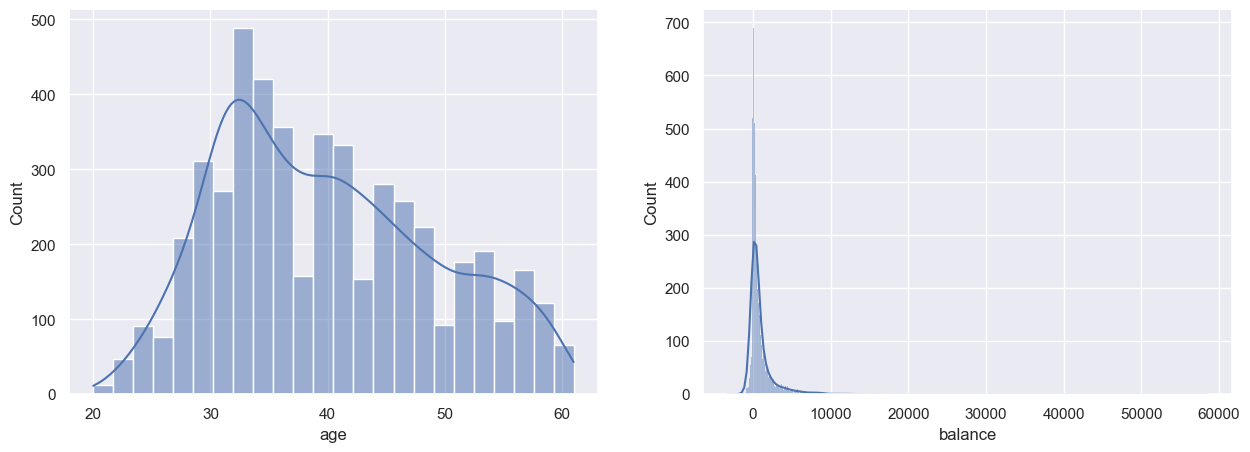

In [14]:
# checking the distribution of two numeric col- age and balance
sns.set(rc={'figure.figsize':(15,5)})
# creating first plot
plt.subplot(1,2,1)
ax=sns.histplot(x='age',data=df1,kde=True)
plt.subplot(1,2,2)
ax=sns.histplot(x='balance',data=df1,kde=True)

print('Age Distribution is right skewed and balance distribution is extremely right skewed')

# Checking wheather the given data is balanced or not

In [15]:
# Number of data labelled as 1
(df1['Deposited_Sub']==1).sum()

157

In [16]:
# number of data labelled as 0
(df1['Deposited_Sub']==0).sum()

4792

In [17]:
# percent of data labelled as 1
(df1['Deposited_Sub']==1).sum()/df1.shape[0]*100

3.1723580521317434

In [18]:
# percent of data labelled as 0
(df1['Deposited_Sub']==0).sum()/df1.shape[0]*100

96.82764194786826

Output Variable has 3.17% data labelled as 1 and 96.80% data labelled as 0. Hence the given dataset is imbalnced or biased

C:\Users\91771\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Deposited_Sub', ylabel='count'>

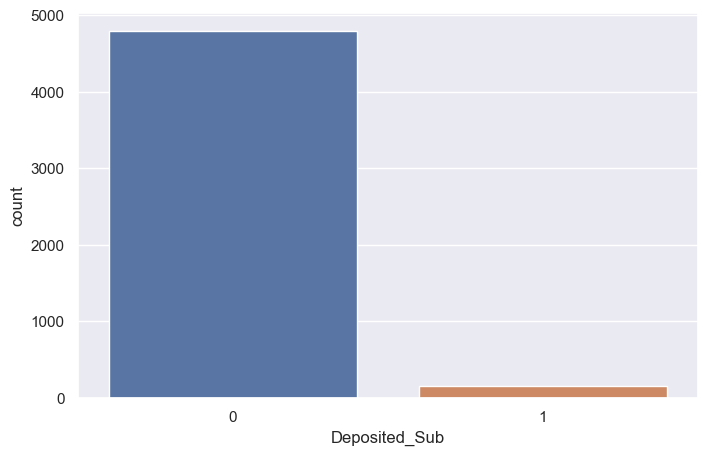

In [22]:
# Exploring output variable
plt.figure(figsize=(8,5))
sns.countplot('Deposited_Sub',data=df1)

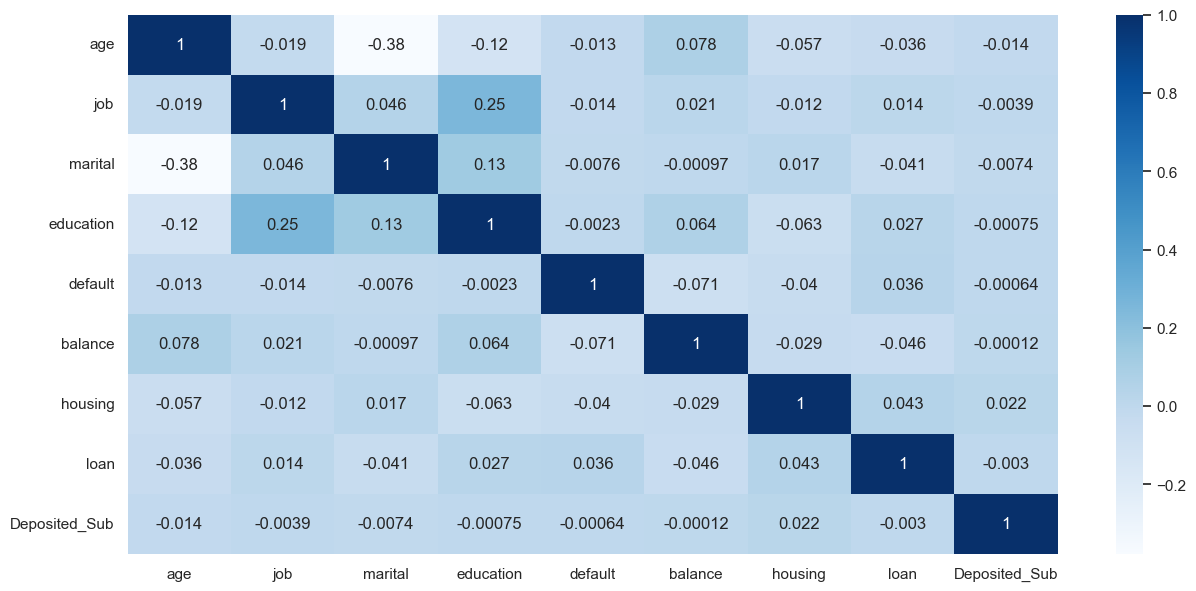

In [23]:
# Checking Correleation 
plt.figure(figsize=(15,7))
ax=sns.heatmap(df1.corr(),annot=True,cmap='Blues')

In [24]:
df2=df1.copy()
df2

,age,job,marital,education,default,balance,housing,loan,Deposited_Sub
0,58,4,1,2,0,2143,1,0,0
1,44,9,2,1,0,29,1,0,0
2,33,2,1,1,0,2,1,1,0
3,35,4,1,2,0,231,1,0,0
4,28,4,2,2,0,447,1,1,0
...,...,...,...,...,...,...,...,...,...
4944,32,1,1,0,0,697,1,0,0
4945,31,6,2,2,0,14692,1,0,0
4946,30,1,1,0,0,595,1,0,0
4947,30,4,2,2,0,1243,1,0,0


In [25]:
# Normalizing age and balance columns
from sklearn.preprocessing import MinMaxScaler
age_ar=df2['age'].values.reshape(-1,1)
balance_ar=df2['balance'].values.reshape(-1,1)
scaler=MinMaxScaler()
df2['age']=scaler.fit_transform(age_ar)
df2['balance']=scaler.fit_transform(balance_ar)
df2

,age,job,marital,education,default,balance,housing,loan,Deposited_Sub
0,0.926829,4,1,2,0,0.088203,1,0,0
1,0.585366,9,2,1,0,0.054028,1,0,0
2,0.317073,2,1,1,0,0.053591,1,1,0
3,0.365854,4,1,2,0,0.057293,1,0,0
4,0.195122,4,2,2,0,0.060785,1,1,0
...,...,...,...,...,...,...,...,...,...
4944,0.292683,1,1,0,0,0.064827,1,0,0
4945,0.268293,6,2,2,0,0.291075,1,0,0
4946,0.243902,1,1,0,0,0.063178,1,0,0
4947,0.243902,4,2,2,0,0.073654,1,0,0


In [26]:
# spliting data into X and Y
X=df2.iloc[:,:-1] # other than Deposited_Sub
Y=df2.iloc[:,-1]  # Deposited_Sub

0       0
1       0
2       0
3       0
4       0
       ..
4944    0
4945    0
4946    0
4947    0
4948    0
Name: Deposited_Sub, Length: 4949, dtype: int32


In [27]:
model1=sm.Logit(Y,X).fit()

Optimization terminated successfully.
         Current function value: 0.146375
         Iterations 8


In [28]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Deposited_Sub   No. Observations:                 4949
Model:                          Logit   Df Residuals:                     4941
Method:                           MLE   Df Model:                            7
Date:                Fri, 09 Feb 2024   Pseudo R-squ.:                -0.04046
Time:                        15:33:57   Log-Likelihood:                -724.41
converged:                       True   LL-Null:                       -696.24
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -2.1934      0.354     -6.194      0.000      -2.887      -1.499
job           -0.0268      0.025     -1.084      0.278      -0.075       0.022
marital       -0.6315      0.120     -5.250      0.000      -0.867      -0.396
education     -0.2794      0.128     -2.191      0.028      -0.529      -0.029
default       -0.4294      0.596     -0.720      0.471      -1.598       0.739
balance       -9.9943      3.598     -2.778      0.005     -17.047      -2.942
housing       -0.6625      0.193     -3.432      0.001      -1.041      -0.284
loan          -0.2569      0.238     -1.078      0.281      -0.724       0.210
==============================================================================
"""

P-value of education > 0.05 so it is insignifiacant here.

In [29]:
pred1=model1.predict()
y_pred1=list(map(round,pred1))

In [32]:
# Calculating RMSE
# If there is no rmse library shown, so used this foll method to calculate rmse.
mse=mean_squared_error(Y,y_pred1)
rmse1=np.sqrt(mse)
print('RMSE for 1st model is:',rmse1)

RMSE for 1st model is: 0.17811114653866397


In [33]:
# Confusion matrix for the model accuracy
from sklearn.metrics import (confusion_matrix,accuracy_score)
confusion_matrix1=confusion_matrix(Y,y_pred1)
accuracy_score1=accuracy_score(Y,y_pred1)
print('confusion matrix1',confusion_matrix1)
print('Accuracy score',accuracy_score1)

confusion matrix1 [[4792    0]
 [ 157    0]]
Accuracy score 0.9682764194786826


From Conclusion matrix it can be seen that
1. (Actual=0) 4792 data points were correctly predicted
2. (Actual=1) 0 data points were correctly labelled as 1

In [34]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred1))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4792
           1       0.00      0.00      0.00       157

    accuracy                           0.97      4949
   macro avg       0.48      0.50      0.49      4949
weighted avg       0.94      0.97      0.95      4949



C:\Users\91771\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91771\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91771\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# model2- Dropping education col

In [35]:
df3=df2.drop('education',axis=1)
df3

,age,job,marital,default,balance,housing,loan,Deposited_Sub
0,0.926829,4,1,0,0.088203,1,0,0
1,0.585366,9,2,0,0.054028,1,0,0
2,0.317073,2,1,0,0.053591,1,1,0
3,0.365854,4,1,0,0.057293,1,0,0
4,0.195122,4,2,0,0.060785,1,1,0
...,...,...,...,...,...,...,...,...
4944,0.292683,1,1,0,0.064827,1,0,0
4945,0.268293,6,2,0,0.291075,1,0,0
4946,0.243902,1,1,0,0.063178,1,0,0
4947,0.243902,4,2,0,0.073654,1,0,0


In [36]:
# Splitting into data
X=df3.iloc[:,:-1]
Y=df3.iloc[:,-1]

In [37]:
model2=sm.Logit(Y,X).fit()

Optimization terminated successfully.
         Current function value: 0.146865
         Iterations 8


In [39]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Deposited_Sub   No. Observations:                 4949
Model:                          Logit   Df Residuals:                     4942
Method:                           MLE   Df Model:                            6
Date:                Fri, 09 Feb 2024   Pseudo R-squ.:                -0.04394
Time:                        15:57:24   Log-Likelihood:                -726.83
converged:                       True   LL-Null:                       -696.24
Covariance Type:            nonrobust   LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -2.2136      0.358     -6.185      0.000      -2.915      -1.512
job           -0.0428      0.024     -1.795      0.073      -0.090       0.004
marital       -0.6724      0.118     -5.709      0.000      -0.903      -0.442
default       -0.4723      0.596     -0.792      0.428      -1.641       0.696
balance      -12.0848      3.620     -3.339      0.001     -19.179      -4.991
housing       -0.6790      0.191     -3.551      0.000      -1.054      -0.304
loan          -0.2892      0.238     -1.216      0.224      -0.755       0.177
==============================================================================
"""

In [41]:
# Finding predicted values
pred2=model2.predict()
y_pred2=list(map(round,pred2))

In [42]:
mse=mean_squared_error(Y,y_pred2)
rmse2=np.sqrt(mse)
print('RMSE for 2nd model:',rmse2)

RMSE for 2nd model: 0.17811114653866397


In [43]:
# Confusion Matrix for the model accuracy

confusion_matrix2 = confusion_matrix(Y,y_pred2)
accuracy_score2=accuracy_score(Y,y_pred2)
print(confusion_matrix2)
print("The accuracy score is:",accuracy_score2)

[[4792    0]
 [ 157    0]]
The accuracy score is: 0.9682764194786826


Dropping the education column has not led to an increase in accuracy.

'''Though the accuracy is high(88.36) and rmse is low(0.34) , it is not a good model as the data is biased or imbalanced.
The precision values substantiate this point. Precision value for label 0 is 0.88 whereas for label 1 is 0. This means the model can accurately predict only the 0 labelled data .
We have seen that the data has 96% of 0 labelled data so its biased towards 0.Hence the model has picked up predicting 0 labels with far more accuracy than 1.
'''